In [1]:
%matplotlib nbagg
import jungfrau_utils as ju
import numpy as np
import json, h5py
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from ipyfilechooser import FileChooser
from scipy.stats.stats import pearsonr

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *


# Load the full scan

In [2]:
fc = FileChooser('/sf/alvra/data/p19506/raw/scan_info/')
fc.use_dir_icons = True
display(fc)

/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileChooser(path='/sf/alvra/data/p19506/raw/scan_info', filename='', title='HTML(value='', layout=Layout(displ…

In [3]:
quantile_corr = 0.8

detector_XAS_1 = channel_diode_1
detector_Izero = channel_Izero117

#######################################################################################################33

(DataDiode_pump, DataDiode_unpump, Pump_probe_Diode,
 Izero_pump, Izero_unpump, correlation, Energy_eV) = XAS_scan_1diode(fc.selected, detector_XAS_1, detector_Izero, quantile_corr)




--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY 1001 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1001 / 1002 -> 0% loss
complete channels: 2 / 3 -> 33% incomplete

--------------------------------------------------------------------------------

Probe rep rate (FEL) is 100.0 Hz
Pump scheme is 1:1
Loaded 499 pump and 499 unpump shots
(318,) shots out of (499,) survived
Step 101 of 101: Processed run_005843
correlation Diode (all shots) = 0.9456196664076656


<IPython.core.display.Javascript object>


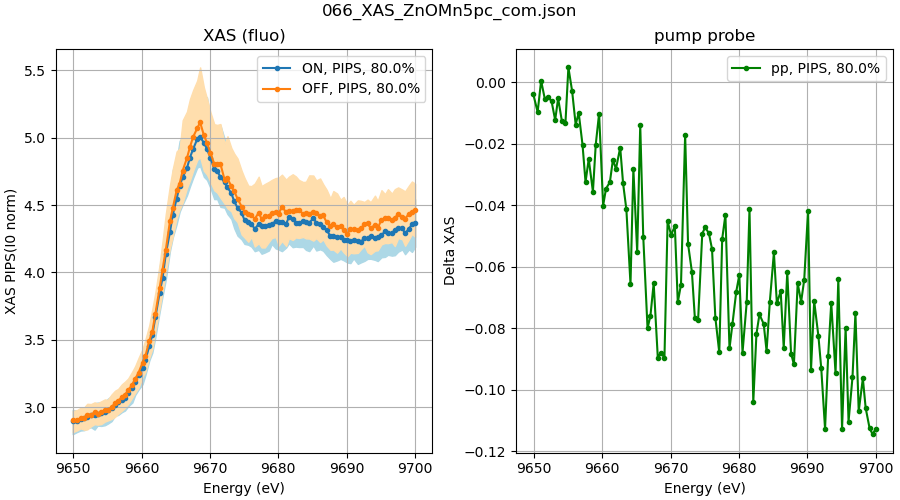

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(fc.selected.split('/')[-1], fontsize = 12)

XAS_pump = DataDiode_pump[:,0]
err_low_pump = DataDiode_pump[:,1]
err_high_pump = DataDiode_pump[:,2]
XAS_unpump = DataDiode_unpump[:,0]
err_low_unpump = DataDiode_unpump[:,1]
err_high_unpump = DataDiode_unpump[:,2]
XAS_pump_probe = Pump_probe_Diode[:,0]
err_low_pump_probe = Pump_probe_Diode[:,1]
err_high_pump_probe = Pump_probe_Diode[:,2]

ax1.plot(Energy_eV, XAS_pump, label='ON, PIPS, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err_low_pump, err_high_pump, color='lightblue')

ax1.plot(Energy_eV, XAS_unpump, label='OFF, PIPS, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err_low_unpump, err_high_unpump, color='navajowhite')

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("XAS PIPS(I0 norm)")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

ax2.plot(Energy_eV, XAS_pump_probe, label='pp, PIPS, {}%'.format(quantile_corr*100),marker='.', color = 'g')

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("Delta XAS")
ax2.set_title('pump probe')
ax2.legend(loc="best")
ax2.grid()

plt.show()

In [5]:
quantile_corr = 0.8

detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero117

#######################################################################################################33

(DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1, 
 DataDiode2_pump, DataDiode2_unpump, Pump_probe_Diode2, 
 Izero_pump, Izero_unpump, correlation1, correlation2, Energy_eV) = XAS_scan_2diodes(fc.selected, detector_XAS_1, detector_XAS_2, detector_Izero, quantile_corr)




--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET  1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY 1001 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1001 / 1002 -> 0% loss
complete channels: 3 / 4 -> 25% incomplete

--------------------------------------------------------------------------------

Probe rep rate (FEL) is 100.0 Hz
Pump scheme is 1:1
Loaded 499 pump and 499 unpump shots
(318,) shots out of (499,) survived
(316,) shots out of (499,) survived
Step 101 of 101: Processed run_005843
correlation Diode1 (all shots) = 0.9456196664076656
correlation Diode2 (all shots) = -0.044006036629004056


<IPython.core.display.Javascript object>


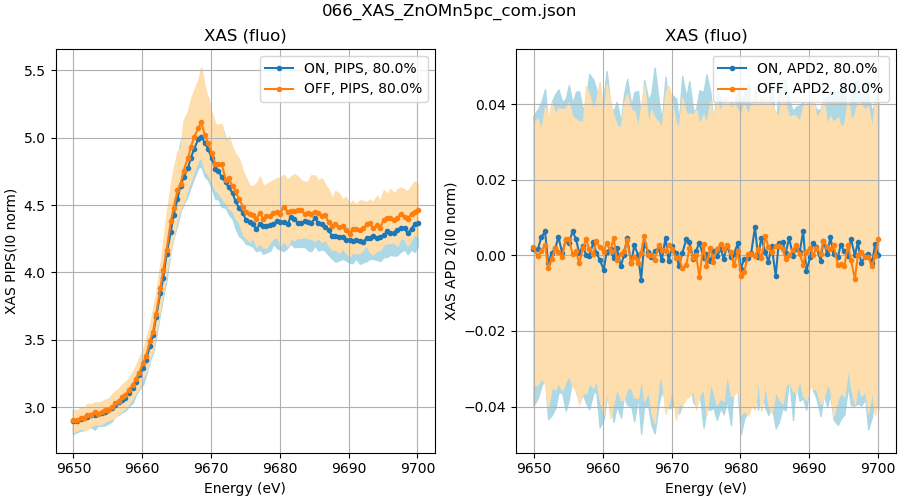

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(fc.selected.split('/')[-1], fontsize = 12)

#Pump_probe_relative = (DataFluo_pump - DataFluo_unpump) / DataFluo_unpump
XAS1_pump = DataDiode1_pump[:,0]
err1_low_pump = DataDiode1_pump[:,1]
err1_high_pump = DataDiode1_pump[:,2]
XAS1_unpump = DataDiode1_unpump[:,0]
err1_low_unpump = DataDiode1_unpump[:,1]
err1_high_unpump = DataDiode1_unpump[:,2]
XAS1_pump_probe = Pump_probe_Diode1[:,0]
err1_low_pump_probe = Pump_probe_Diode1[:,1]
err1_high_pump_probe = Pump_probe_Diode1[:,2]

XAS2_pump = DataDiode2_pump[:,0]
err2_low_pump = DataDiode2_pump[:,1]
err2_high_pump = DataDiode2_pump[:,2]
XAS2_unpump = DataDiode2_unpump[:,0]
err2_low_unpump = DataDiode2_unpump[:,1]
err2_high_unpump = DataDiode2_unpump[:,2]
XAS2_pump_probe = Pump_probe_Diode2[:,0]
err2_low_pump_probe = Pump_probe_Diode2[:,1]
err2_high_pump_probe = Pump_probe_Diode2[:,2]

# plt.subplot(1,2,1)
ax1.plot(Energy_eV, XAS1_pump, label='ON, PIPS, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err1_low_pump, err1_high_pump, color='lightblue')

ax1.plot(Energy_eV, XAS1_unpump, label='OFF, PIPS, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err1_low_unpump, err1_high_unpump, color='navajowhite')

#ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("XAS PIPS(I0 norm)")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

# plt.subplot(1,2,2)
ax2.plot(Energy_eV, XAS2_pump, label='ON, APD2, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err2_low_pump, err2_high_pump, color='lightblue')

ax2.plot(Energy_eV, XAS2_unpump, label='OFF, APD2, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err2_low_unpump, err2_high_unpump, color='navajowhite')
#ax2.set_ylim(0,3)
#ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("XAS APD 2(I0 norm)")
ax2.set_title('XAS (fluo)')
ax2.legend(loc="best")
ax2.grid()

#plt.subplot(1,3,3)
#plt.plot(Energy_eV, XAS_APD_pump_probe, label='pump-probe, APD, {}%'.format(quantile_corr*100),color='green', marker='.')
#plt.fill_between(Energy_eV,err_APD_low_pump_probe, err_APD_high_pump_probe, color='lightgreen')

#plt.plot(Energy_eV, XAS_PIPS_pump_probe, label='pump-probe, PIPS, {}%'.format(quantile_corr*100),color='magenta', marker='.')
#plt.fill_between(Energy_eV,err_PIPS_low_pump_probe, err_PIPS_high_pump_probe, color='pink')


#plt.xlabel("Energy (eV)")
#plt.ylabel ("DeltaXAS (I0 norm)")
#plt.gca().set_title('pump-probe vs energy')
#plt.legend(loc="best")
#plt.grid()
# plt.tight_layout()

plt.show()
#plt.savefig('/das/work/p18/p18387/exported_data/L-cystine_XAS.png')


In [8]:
quantile_corr = 0.8

channel_list_pp = [channel_Events, channel_APD_Ch1, channel_APD_Ch2, channel_Izero117]
channel_list_all = channel_list_pp 

########################################################################
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)
Energy_eV = scan.readbacks

Energy_eV = np.asarray(Energy_eV)

DataAPD1_pump = []
DataAPD1_unpump = []
Pump_probe_APD1 = []

DataAPD2_pump = []
DataAPD2_unpump = []
Pump_probe_APD2 = []

Izero_pump = []
Izero_unpump = []

correlation = []

for i, step in enumerate(scan):
#    try:
    check_files_and_data(step)
    clear_output(wait=True)
    filename = scan.files[i][0].split('/')[-1].split('.')[0]

    resultsPP, results, _, _ = load_data_compact_laser_pump(channel_list_pp, channel_list_all, step)
    
    IzeroFEL_pump_shot = resultsPP[channel_Izero117].pump
    IzeroFEL_unpump_shot = resultsPP[channel_Izero117].unpump
    DataAPD1_pump_shot = resultsPP[channel_APD_Ch1].pump
    DataAPD1_unpump_shot = resultsPP[channel_APD_Ch1].unpump
    DataAPD2_pump_shot = resultsPP[channel_APD_Ch2].pump
    DataAPD2_unpump_shot = resultsPP[channel_APD_Ch2].unpump
    
    DataAPD1_pump_shot_norm = DataAPD1_pump_shot / IzeroFEL_pump_shot
    DataAPD1_unpump_shot_norm = DataAPD1_unpump_shot / IzeroFEL_unpump_shot
    #Pump_probe_APD1_shot = DataAPD1_pump_shot_norm - DataAPD1_unpump_shot_norm
    
    DataAPD2_pump_shot_norm = DataAPD2_pump_shot / IzeroFEL_pump_shot
    DataAPD2_unpump_shot_norm = DataAPD2_unpump_shot / IzeroFEL_unpump_shot
    Pump_probe_APD2_shot = DataAPD2_pump_shot_norm - DataAPD2_unpump_shot_norm
    
    ######################################3
    
    qnt_low_pump = np.nanquantile(DataAPD1_pump_shot_norm, 0.5 - quantile_corr/2)
    qnt_high_pump = np.nanquantile(DataAPD1_pump_shot_norm, 0.5 + quantile_corr/2)
    qnt_low_unpump = np.nanquantile(DataAPD1_unpump_shot_norm, 0.5 - quantile_corr/2)
    qnt_high_unpump = np.nanquantile(DataAPD1_unpump_shot_norm, 0.5 + quantile_corr/2)

    condition_corr_pump_low = DataAPD1_pump_shot_norm > qnt_low_pump
    condition_corr_pump_high = DataAPD1_pump_shot_norm < qnt_high_pump
    condition_corr_unpump_low = DataAPD1_unpump_shot_norm > qnt_low_unpump
    condition_corr_unpump_high = DataAPD1_unpump_shot_norm < qnt_high_unpump

    correlation_filter = condition_corr_unpump_low & condition_corr_unpump_high & \
                    condition_corr_pump_low & condition_corr_pump_high
    
    DataAPD1_pump_shot_filter = DataAPD1_pump_shot[correlation_filter]
    DataAPD1_unpump_shot_filter = DataAPD1_unpump_shot[correlation_filter]
    IzeroFEL_pump_shot_filter = IzeroFEL_pump_shot[correlation_filter]
    IzeroFEL_unpump_shot_filter = IzeroFEL_unpump_shot[correlation_filter]
    
    DataAPD1_pump_shot_norm = DataAPD1_pump_shot_filter / IzeroFEL_pump_shot_filter
    DataAPD1_unpump_shot_norm = DataAPD1_unpump_shot_filter / IzeroFEL_unpump_shot_filter
    
    Pump_probe_APD1_shot = DataAPD1_pump_shot_norm - DataAPD1_unpump_shot_norm
    df_pump_probe_APD1 = pd.DataFrame(Pump_probe_APD1_shot)
    Pump_probe_APD1.append(np.nanquantile(df_pump_probe_APD1, [0.5, 0.5 - quantile_corr/2, 0.5 + quantile_corr/2]))
    
    ######################################3


    df_pump_APD1 = pd.DataFrame(DataAPD1_pump_shot_norm)
    df_unpump_APD1 = pd.DataFrame(DataAPD1_unpump_shot_norm)
    #df_pump_probe_APD1 = pd.DataFrame(Pump_probe_APD1_shot)

    df_pump_APD2 = pd.DataFrame(DataAPD2_pump_shot_norm)
    df_unpump_APD2 = pd.DataFrame(DataAPD2_unpump_shot_norm)
    df_pump_probe_APD2 = pd.DataFrame(Pump_probe_APD2_shot)

    DataAPD1_pump.append(np.nanquantile(df_pump_APD1, [0.5, 0.5 - quantile_corr/2, 0.5 + quantile_corr/2]))
    DataAPD1_unpump.append(np.nanquantile(df_unpump_APD1, [0.5, 0.5 - quantile_corr/2, 0.5 + quantile_corr/2]))
    #Pump_probe_APD1.append(np.nanquantile(df_pump_probe_APD1, [0.5, 0.5 - quantile_corr/2, 0.5 + quantile_corr/2]))

    DataAPD2_pump.append(np.nanquantile(df_pump_APD2, [0.5, 0.5 - quantile_corr/2, 0.5 + quantile_corr/2]))
    DataAPD2_unpump.append(np.nanquantile(df_unpump_APD2, [0.5, 0.5 - quantile_corr/2, 0.5 + quantile_corr/2]))
    Pump_probe_APD2.append(np.nanquantile(df_pump_probe_APD2, [0.5, 0.5 - quantile_corr/2, 0.5 + quantile_corr/2]))
    
    correlation.append(pearsonr(IzeroFEL_pump_shot,DataAPD1_pump_shot)[0])
    Izero_pump.append(np.mean(IzeroFEL_pump_shot))
    Izero_unpump.append(np.mean(IzeroFEL_unpump_shot))
    
#    except:
#        Energy_eV = np.delete(Energy_eV, i)
    
    
    print ('Step {} of {}: Processed {}'.format(i+1, len(scan.files), filename))
    print ("correlation PIPS = {}".format(pearsonr(IzeroFEL_pump_shot,DataAPD1_pump_shot)[0]))
#    print ("correlation APD2 = {}".format(pearsonr(IzeroFEL_pump_shot,DataAPD2_pump_shot)[0]))
    
Energy_eV = Energy_eV[:np.shape(Pump_probe_APD1)[0]]
    
DataAPD1_pump = np.asarray(DataAPD1_pump)
DataAPD1_unpump = np.asarray(DataAPD1_unpump)
Pump_probe_APD1 = np.asarray(Pump_probe_APD1)

DataAPD2_pump = np.asarray(DataAPD2_pump)
DataAPD2_unpump = np.asarray(DataAPD2_unpump)
Pump_probe_APD2 = np.asarray(Pump_probe_APD2)

Izero_pump = np.asarray(Izero_pump)
Izero_unpump = np.asarray(Izero_unpump)

#minlen = min(len(i) for i in Pump_probe_APD1)
#print (minlen)
#def cut(arr, minlen):
#    return np.array([i[:minlen] for i in arr])

#DataAPD1_pump = cut(DataAPD1_pump, minlen)
#DataAPD1_unpump = cut(DataAPD1_unpump, minlen)
#Pump_probe_APD1 = cut(Pump_probe_APD1, minlen)
#DataAPD2_pump = cut(DataAPD2_pump, minlen)
#DataAPD2_unpump2 = cut(DataAPD2_unpump, minlen)
#Pump_probe_APD2 = cut(Pump_probe_APD2, minlen)

print ("Job done!")



--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET  1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY 1001 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1001 / 1002 -> 0% loss
complete channels: 3 / 4 -> 25% incomplete

--------------------------------------------------------------------------------

Probe rep rate (FEL) is 100.0 Hz
Pump scheme is 1:1
Loaded 499 pump and 499 unpump shots
Step 101 of 101: Processed run_005843
correlation PIPS = 0.9456196664076656
Job done!


In [140]:
scan.files[-1][1].split('/')[-1].split('.')[0]

'run_005641'

<IPython.core.display.Javascript object>


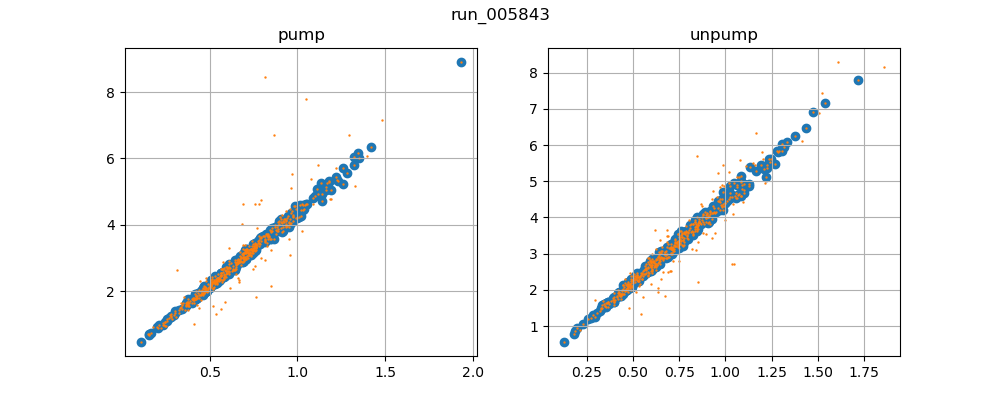

In [33]:
plt.figure(figsize=(10,4))
plt.suptitle(scan.files[-1][1].split('/')[-1].split('.')[0])
plt.subplot(121)
plt.title('pump')
plt.scatter(IzeroFEL_pump_shot_filter, DataAPD1_pump_shot_filter)
plt.scatter(IzeroFEL_pump_shot, DataAPD1_pump_shot, s = 0.5)
plt.grid()


plt.subplot(122)
plt.title('unpump')
plt.scatter(IzeroFEL_unpump_shot_filter, DataAPD1_unpump_shot_filter)
plt.scatter(IzeroFEL_unpump_shot, DataAPD1_unpump_shot, s = 0.5)
plt.grid()

plt.show()


<IPython.core.display.Javascript object>


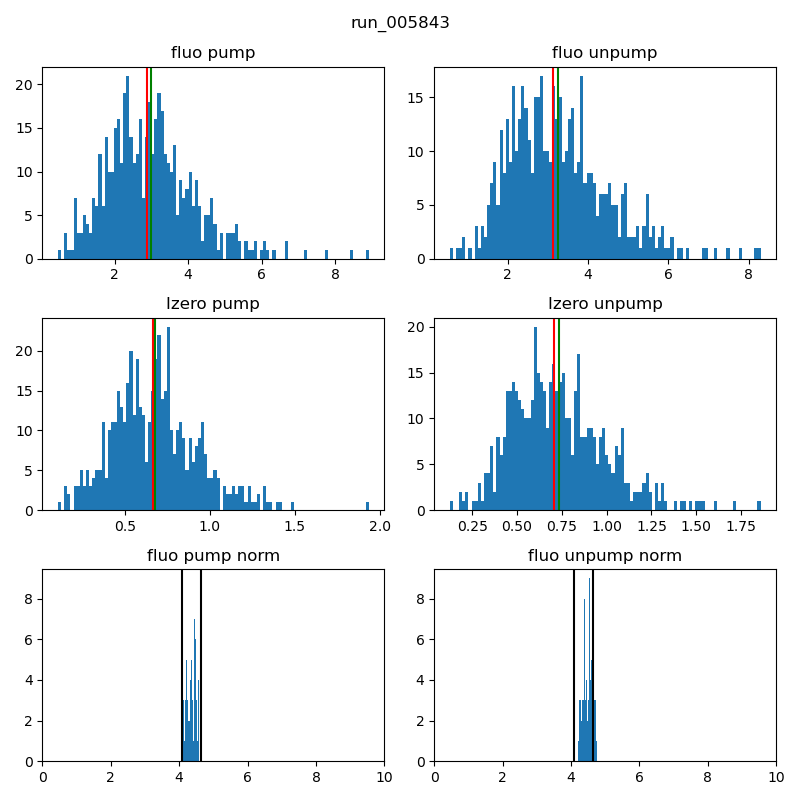

In [34]:
plt.figure(figsize=(8,8))
plt.suptitle(scan.files[-1][1].split('/')[-1].split('.')[0])


plt.subplot(321)
plt.title('fluo pump')
plt.hist(DataAPD1_pump_shot, bins = 100)
plt.axvline(x=np.median(DataAPD1_pump_shot), color ='r')
plt.axvline(x=np.mean(DataAPD1_pump_shot), color ='g')

plt.subplot(322)
plt.title('fluo unpump')
plt.hist(DataAPD1_unpump_shot, bins = 100)
plt.axvline(x=np.median(DataAPD1_unpump_shot), color ='r')
plt.axvline(x=np.mean(DataAPD1_unpump_shot), color ='g')

plt.subplot(323)
plt.title('Izero pump')
plt.hist(IzeroFEL_pump_shot, bins = 100)
plt.axvline(x=np.median(IzeroFEL_pump_shot), color ='r')
plt.axvline(x=np.mean(IzeroFEL_pump_shot), color ='g')

plt.subplot(324)
plt.title('Izero unpump')
plt.hist(IzeroFEL_unpump_shot, bins = 100)
plt.axvline(x=np.median(IzeroFEL_unpump_shot), color ='r')
plt.axvline(x=np.mean(IzeroFEL_unpump_shot), color ='g')

plt.subplot(325)
plt.title('fluo pump norm')
plt.hist(DataAPD1_pump_shot_norm, bins = 100)
plt.axvline(x=qnt_low_pump, color = 'black')
plt.axvline(x=qnt_high_pump, color = 'black')
plt.xlim(0,10)

plt.subplot(326)
plt.title('fluo unpump norm')
plt.hist(DataAPD1_unpump_shot_norm, bins = 100)
plt.axvline(x=qnt_low_pump, color = 'black')
plt.axvline(x=qnt_high_pump, color = 'black')
plt.xlim(0,10)


plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


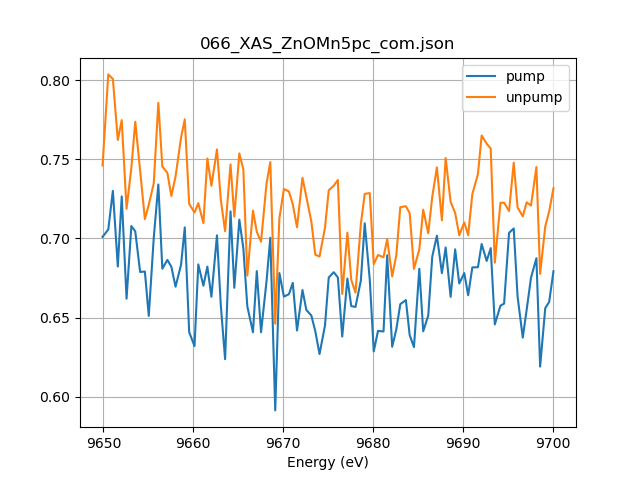

In [35]:
plt.figure()
plt.title(fc.selected_filename)
#plt.plot(Energy_eV, correlation)
plt.plot(Energy_eV, Izero_pump, label = 'pump')
plt.plot(Energy_eV, Izero_unpump, label = 'unpump')
plt.legend(loc='best')
plt.xlabel('Energy (eV)')
#plt.ylabel('Correlation')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


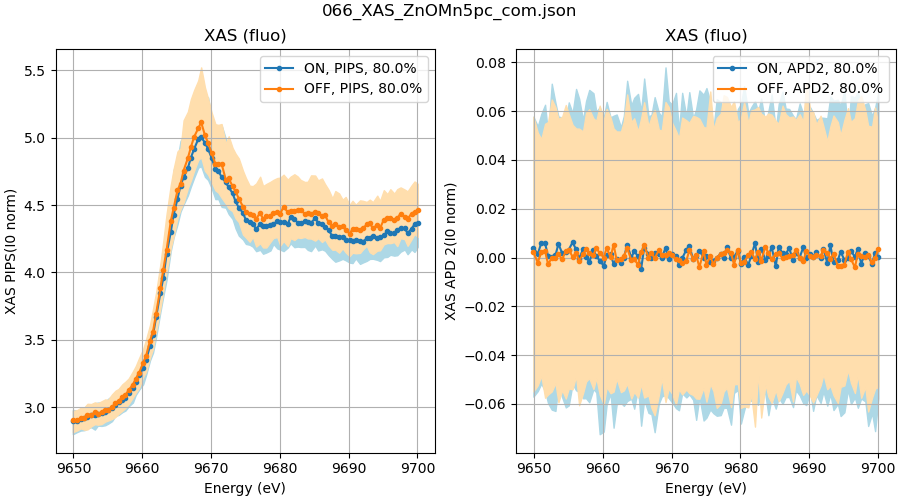

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(fc.selected.split('/')[-1], fontsize = 12)

#Pump_probe_relative = (DataFluo_pump - DataFluo_unpump) / DataFluo_unpump
XAS_APD1_pump = DataAPD1_pump[:,0]
err_APD1_low_pump = DataAPD1_pump[:,1]
err_APD1_high_pump = DataAPD1_pump[:,2]
XAS_APD1_unpump = DataAPD1_unpump[:,0]
err_APD1_low_unpump = DataAPD1_unpump[:,1]
err_APD1_high_unpump = DataAPD1_unpump[:,2]
XAS_APD1_pump_probe = Pump_probe_APD1[:,0]
err_APD1_low_pump_probe = Pump_probe_APD1[:,1]
err_APD1_high_pump_probe = Pump_probe_APD1[:,2]

XAS_APD2_pump = DataAPD2_pump[:,0]
err_APD2_low_pump = DataAPD2_pump[:,1]
err_APD2_high_pump = DataAPD2_pump[:,2]
XAS_APD2_unpump = DataAPD2_unpump[:,0]
err_APD2_low_unpump = DataAPD2_unpump[:,1]
err_APD2_high_unpump = DataAPD2_unpump[:,2]
XAS_APD2_pump_probe = Pump_probe_APD2[:,0]
err_APD2_low_pump_probe = Pump_probe_APD2[:,1]
err_APD2_high_pump_probe = Pump_probe_APD2[:,2]

# plt.subplot(1,2,1)
ax1.plot(Energy_eV, XAS_APD1_pump, label='ON, PIPS, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err_APD1_low_pump, err_APD1_high_pump, color='lightblue')

ax1.plot(Energy_eV, XAS_APD1_unpump, label='OFF, PIPS, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err_APD1_low_unpump, err_APD1_high_unpump, color='navajowhite')

#ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("XAS PIPS(I0 norm)")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

# plt.subplot(1,2,2)
ax2.plot(Energy_eV, XAS_APD2_pump, label='ON, APD2, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err_APD2_low_pump, err_APD2_high_pump, color='lightblue')

ax2.plot(Energy_eV, XAS_APD2_unpump, label='OFF, APD2, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err_APD2_low_unpump, err_APD2_high_unpump, color='navajowhite')
#ax2.set_ylim(0,3)
#ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("XAS APD 2(I0 norm)")
ax2.set_title('XAS (fluo)')
ax2.legend(loc="best")
ax2.grid()

#plt.subplot(1,3,3)
#plt.plot(Energy_eV, XAS_APD_pump_probe, label='pump-probe, APD, {}%'.format(quantile_corr*100),color='green', marker='.')
#plt.fill_between(Energy_eV,err_APD_low_pump_probe, err_APD_high_pump_probe, color='lightgreen')

#plt.plot(Energy_eV, XAS_PIPS_pump_probe, label='pump-probe, PIPS, {}%'.format(quantile_corr*100),color='magenta', marker='.')
#plt.fill_between(Energy_eV,err_PIPS_low_pump_probe, err_PIPS_high_pump_probe, color='pink')


#plt.xlabel("Energy (eV)")
#plt.ylabel ("DeltaXAS (I0 norm)")
#plt.gca().set_title('pump-probe vs energy')
#plt.legend(loc="best")
#plt.grid()
# plt.tight_layout()

plt.show()
#plt.savefig('/das/work/p18/p18387/exported_data/L-cystine_XAS.png')


/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


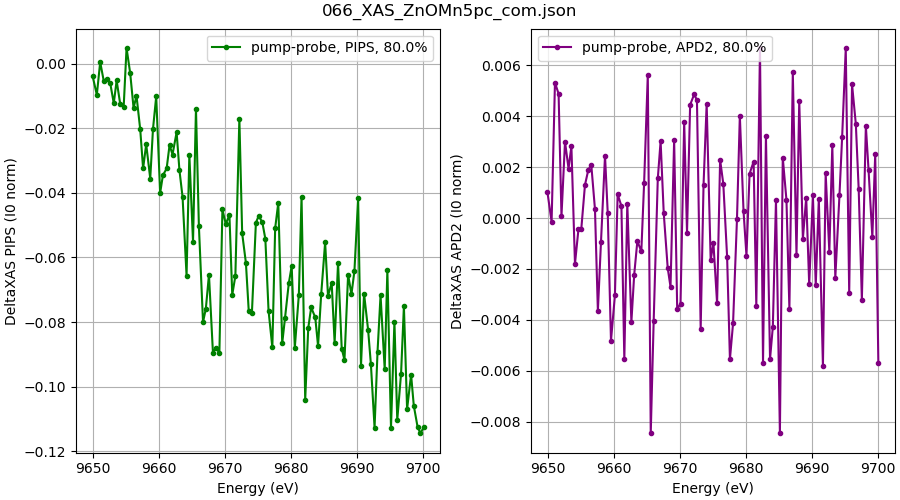

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(fc.selected.split('/')[-1], fontsize = 12)

# plt.subplot(1,2,1)
ax1.plot(Energy_eV, XAS_APD1_pump_probe, label='pump-probe, PIPS, {}%'.format(quantile_corr*100),color='green', marker='.')
#ax1.plot(Energy_eV, XAS_APD1_pump - XAS_APD1_unpump, label='pump-probe avg, PIPS, {}%'.format(quantile_corr*100),color='blue', marker='.')

#ax1.fill_between(Energy_eV,err_APD1_low_pump_probe, err_APD1_high_pump_probe, color='lightgreen')

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("DeltaXAS PIPS (I0 norm)")
ax1.set_title('')
ax1.legend(loc="best")
#ax1.set_ylim(-0.4,0.2)
ax1.grid()
# plt.tight_layout()

# plt.subplot(1,2,2)
ax2.plot(Energy_eV, XAS_APD2_pump_probe, label='pump-probe, APD2, {}%'.format(quantile_corr*100),color='purple', marker='.')
#ax2.fill_between(Energy_eV,err_APD2_low_pump_probe, err_APD2_high_pump_probe, color='lavender')
#ax2.set_ylim(-0.04,0.04)

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("DeltaXAS APD2 (I0 norm)")
ax2.set_title('')
ax2.legend(loc="best")
ax2.grid()
# plt.tight_layout()


plt.show()


/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


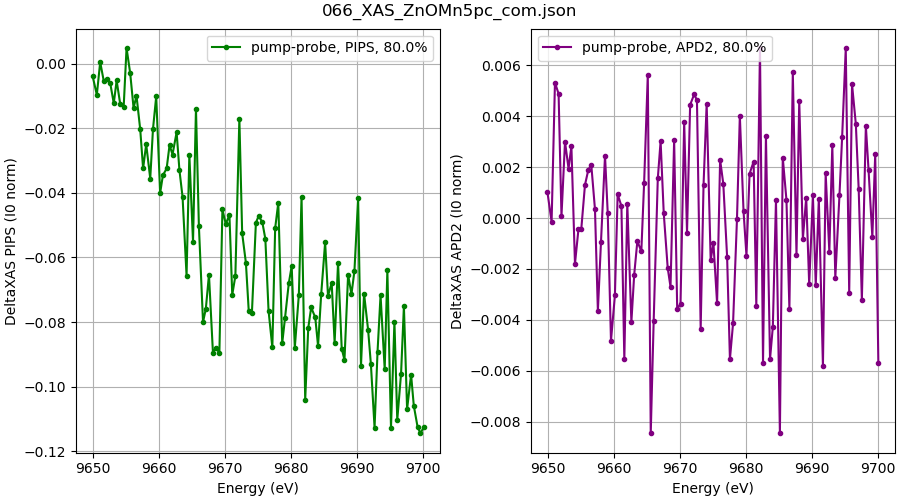

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(fc.selected.split('/')[-1], fontsize = 12)

# plt.subplot(1,2,1)
ax1.plot(Energy_eV, XAS_APD1_pump_probe, label='pump-probe, PIPS, {}%'.format(quantile_corr*100),color='green', marker='.')
#ax1.plot(Energy_eV, XAS_APD1_pump - XAS_APD1_unpump, label='pump-probe, PIPS, {}%'.format(quantile_corr*100),color='green', marker='.')

#ax1.fill_between(Energy_eV,err_APD1_low_pump_probe, err_APD1_high_pump_probe, color='lightgreen')

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("DeltaXAS PIPS (I0 norm)")
ax1.set_title('')
ax1.legend(loc="best")
#ax1.set_ylim(-0.4,0.2)
ax1.grid()
# plt.tight_layout()

# plt.subplot(1,2,2)
ax2.plot(Energy_eV, XAS_APD2_pump_probe, label='pump-probe, APD2, {}%'.format(quantile_corr*100),color='purple', marker='.')
#ax2.fill_between(Energy_eV,err_APD2_low_pump_probe, err_APD2_high_pump_probe, color='lavender')
#ax2.set_ylim(-0.04,0.04)

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("DeltaXAS APD2 (I0 norm)")
ax2.set_title('')
ax2.legend(loc="best")
ax2.grid()
# plt.tight_layout()


plt.show()


/sf/alvra/anaconda/alvra-analysis/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


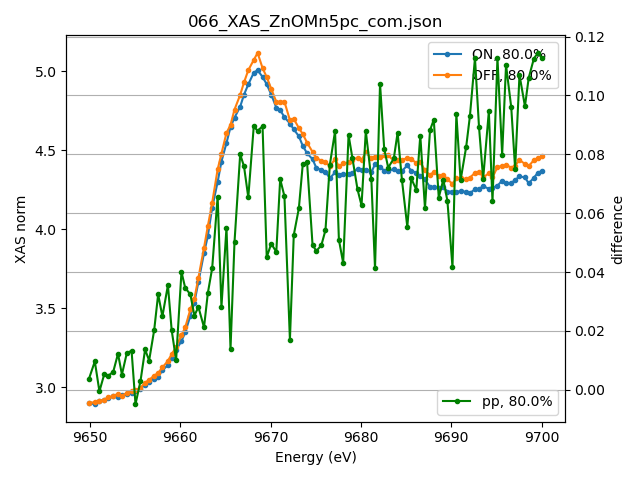

In [39]:
fig, ax1 = plt.subplots()
plt.title(fc.selected_filename)

ax2 = ax1.twinx()
ax1.plot(Energy_eV, XAS_APD1_pump, label='ON, {}%'.format(quantile_corr*100),marker='.')
#ax1.fill_between(Energy_eV, err_APD1_low_pump, err_APD1_high_pump, color='lightblue')

ax1.plot(Energy_eV, XAS_APD1_unpump, label='OFF, {}%'.format(quantile_corr*100),marker='.')
#ax1.fill_between(Energy_eV, err_APD1_low_unpump, err_APD1_high_unpump, color='navajowhite')

ax2.plot(Energy_eV, -XAS_APD1_pump_probe, label='pp, {}%'.format(quantile_corr*100),marker='.', color='g')
#ax2.plot(Energy_eV, (XAS_APD1_pump-XAS_APD1_unpump)/XAS_APD1_unpump, label='pp, {}%'.format(quantile_corr*100),marker='.', color='g')
#ax2.fill_between(Energy_eV,err_APD1_low_pump_probe, err_APD1_high_pump_probe, color='lightgreen')


ax1.legend(loc='best')
ax2.legend(loc='lower right')
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('XAS norm')
ax2.set_ylabel('difference')
plt.grid()
plt.tight_layout()
plt.show()

## Load files in a loop

In [186]:
import glob

datafiles = []
for file in glob.glob('/sf/alvra/data/p19506/raw/scan_info/*_XAS_ZnO_com_80ps_*'):
    datafiles.append(file)
datafiles = sorted(datafiles, key = os.path.getmtime)
patch = datafiles[0:8]
patch

['/sf/alvra/data/p19506/raw/scan_info/043_XAS_ZnO_com_80ps_1.json',
 '/sf/alvra/data/p19506/raw/scan_info/044_XAS_ZnO_com_80ps_0.json',
 '/sf/alvra/data/p19506/raw/scan_info/045_XAS_ZnO_com_80ps_1.json',
 '/sf/alvra/data/p19506/raw/scan_info/046_XAS_ZnO_com_80ps_0.json',
 '/sf/alvra/data/p19506/raw/scan_info/047_XAS_ZnO_com_80ps_1.json',
 '/sf/alvra/data/p19506/raw/scan_info/048_XAS_ZnO_com_80ps_0.json',
 '/sf/alvra/data/p19506/raw/scan_info/049_XAS_ZnO_com_80ps_1.json',
 '/sf/alvra/data/p19506/raw/scan_info/050_XAS_ZnO_com_80ps_0.json']

In [187]:
quantile_corr = 0.5

channel_list_pp = [channel_Events, channel_APD_Ch1, channel_Izero117]
channel_list_all = channel_list_pp + [channel_energy]

########################################################################
from sfdata import SFScanInfo

DataFluo_pump_all = []
DataFluo_unpump_all = []
Pump_probe_all = []

Energy_eV_all = []

for json_file in patch:
    scan = SFScanInfo(json_file)
    Energy_eV = scan.readbacks

    Energy_eV = np.asarray(Energy_eV)
    
    DataFluo_pump = []
    DataFluo_unpump = []
    err_DataFluo_pump = []
    err_DataFluo_unpump = []

    Pump_probe = []
    err_Pump_probe = []

    for i, step in enumerate(scan):
#        try:
        check_files_and_data(step)
        clear_output(wait=True)
        filename = scan.files[i][0].split('/')[-1].split('.')[0]
        print (json_file.split('/')[-1])
        print ('Step {} of {}: Processing {}'.format(i+1, len(scan.files), filename))

        resultsPP, results, _, _ = load_data_compact_laser_pump(channel_list_pp, channel_list_all, step)

        IzeroFEL_pump_shot = resultsPP[channel_Izero117].pump
        IzeroFEL_unpump_shot = resultsPP[channel_Izero117].unpump
        DataFluo_pump_shot = resultsPP[channel_APD_Ch1].pump
        DataFluo_unpump_shot = resultsPP[channel_APD_Ch1].unpump

        DataFluo_pump_shot_norm = DataFluo_pump_shot / IzeroFEL_pump_shot
        DataFluo_unpump_shot_norm = DataFluo_unpump_shot / IzeroFEL_unpump_shot
        Pump_probe_shot = DataFluo_pump_shot_norm - DataFluo_unpump_shot_norm

        df_pump = pd.DataFrame(DataFluo_pump_shot_norm)
        df_unpump = pd.DataFrame(DataFluo_unpump_shot_norm)
        df_pump_probe = pd.DataFrame(Pump_probe_shot)

        DataFluo_pump.append(np.nanquantile(df_pump, [0.5, 0.5 - quantile_corr/2, 0.5 + quantile_corr/2]))
        DataFluo_unpump.append(np.nanquantile(df_unpump, [0.5, 0.5 - quantile_corr/2, 0.5 + quantile_corr/2]))
        Pump_probe.append(np.nanquantile(df_pump_probe, [0.5, 0.5 - quantile_corr/2, 0.5 + quantile_corr/2]))
#    except:
#            Energy_eV = np.delete(Energy_eV, i)

    DataFluo_pump = np.asarray(DataFluo_pump)
    DataFluo_unpump = np.asarray(DataFluo_unpump)
    Pump_probe = np.asarray(Pump_probe)

    minlen = min(len(i) for i in Pump_probe)
    def cut(arr, minlen):
        return np.array([i[:minlen] for i in arr])

    DataFluo_pump = cut(DataFluo_pump, minlen)
    DataFluo_unpump = cut(DataFluo_unpump, minlen)
    Pump_probe = cut(Pump_probe, minlen)

    DataFluo_pump_all.append(DataFluo_pump)
    DataFluo_unpump_all.append(DataFluo_unpump)
    Pump_probe_all.append(Pump_probe)

    Energy_eV_all.append(Energy_eV)

DataFluo_pump_all = np.array(DataFluo_pump_all)
DataFluo_unpump_all = np.array(DataFluo_unpump_all)
Pump_probe_all = np.array(Pump_probe_all)

Energy_eV_all = np.array(Energy_eV_all)

print ("Job done!")
import nu,mp

050_XAS_ZnO_com_80ps_0.json
Step 65 of 65: Processing run_003808

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet           501 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET          501 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY         496 / 501 -> 1% loss ▇▇▇▇▇▇▇▇▇
SLAAR11-LTIM01-EVR0:DUMMY_PV4_NBS 501 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 496 / 501 -> 1% loss
complete channels: 3 / 4 -> 25% incomplete

--------------------------------------------------------------------------------

Probe rep rate (FEL) is 100.0 Hz
Pump scheme is 1:1
Loaded 245 pump and 245 unpump shots
Job done!


In [35]:
import numpy as np

theta_1 = 57.6
theta_2 = 41.2

pixsize = 0.075          # [mm]

dist_cry1 = 160.8        # [mm]
dist_cry2 = 285.5        # [mm]

dhkl_cry1 = 4.912/2
dhkl_cry2 = 6.2712/2

#E_eV = 12398 / lambda_ang

print(dhkl_cry1, dhkl_cry2)
#2*dhkl*sin(theta) = lambda_ang

print(250./np.tan(np.deg2rad(theta_1)))
print(250./np.tan(np.deg2rad(theta_2)))

2.456 3.1356
158.654824386037
285.5726994478387


In [88]:
cry1 = 7972
cry2 = 4367

# lambda1 = 4.374267 # 4.139707846410684

theta1 = np.arcsin(12398/2/dhkl_cry1/2696)
print(theta1, np.rad2deg(theta1))
# theta1 = np.arcsin(lambda1/2/dhkl_cry1)
delta1 = 500/np.tan((theta1)) - pixsize*(9215-cry1)

theta2 = np.arcsin(12398/2/dhkl_cry2/2696)
print(theta2, np.rad2deg(theta2))
# theta2 = np.arcsin(lambda1/2/dhkl_cry2)
delta2 = 500/np.tan(theta2) - pixsize*(9215-cry2)

print(delta1, delta2, delta2-delta1)
print((delta2-delta1)/pixsize)

1.211687068967581 69.42455514241949
0.8231614785089655 47.16367857631254
94.46812524451207 99.9941819000997 5.526056655587638
73.68075540783518


<IPython.core.display.Javascript object>


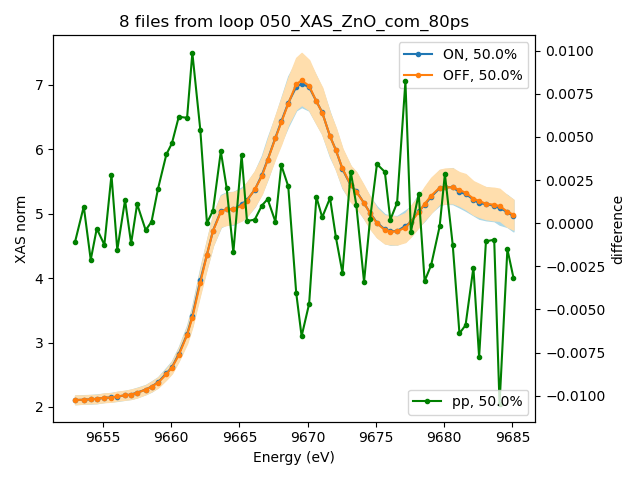

In [201]:
XAS_pump = np.mean(DataFluo_pump_all, axis=0)[:,0]
err_low_pump = np.mean(DataFluo_pump_all, axis=0)[:,1]
err_high_pump = np.mean(DataFluo_pump_all, axis=0)[:,2]
XAS_unpump = np.mean(DataFluo_unpump_all, axis=0)[:,0]
err_low_unpump = np.mean(DataFluo_unpump_all, axis=0)[:,1]
err_high_unpump = np.mean(DataFluo_unpump_all, axis =0)[:,2]
XAS_pump_probe = np.mean(Pump_probe_all, axis=0)[:,0]
err_low_pump_probe = np.mean(Pump_probe_all, axis=0)[:,1]
err_high_pump_probe = np.mean(Pump_probe_all, axis=0)[:,2]

fig, ax1 = plt.subplots()
plt.title('{} files from loop {}'.format(len(patch), json_file.split('/')[-1][:-7]))

ax2 = ax1.twinx()
ax1.plot(Energy_eV_all[0], XAS_pump, label='ON, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV_all[0], err_low_pump, err_high_pump, color='lightblue')

ax1.plot(Energy_eV_all[0], XAS_unpump, label='OFF, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV_all[0], err_low_unpump, err_high_unpump, color='navajowhite')


ax2.plot(Energy_eV_all[0], XAS_pump_probe/XAS_pump, label='pp, {}%'.format(quantile_corr*100),marker='.', color='g')

ax1.legend(loc='best')
ax2.legend(loc='lower right')
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('XAS norm')
ax2.set_ylabel('difference')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


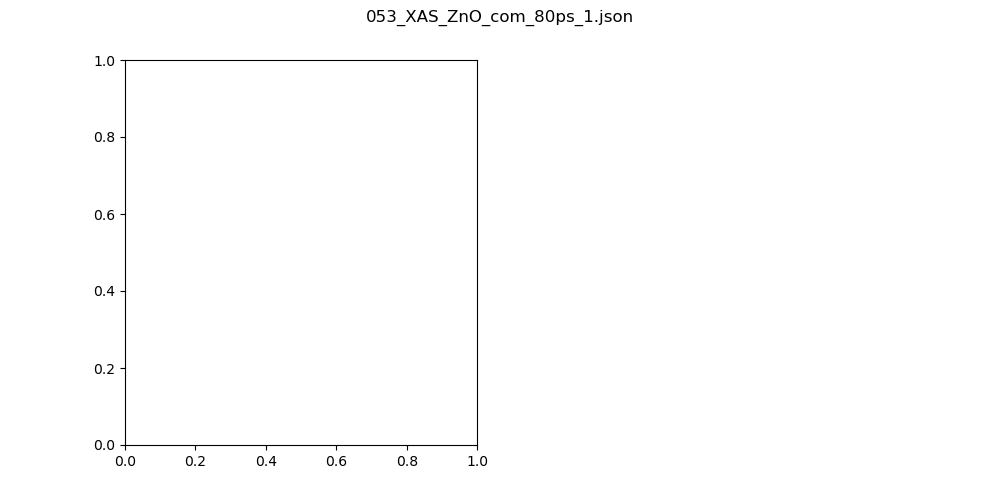

IndexError: index 3 is out of bounds for axis 0 with size 2

In [107]:
# DataFluo_pump_aver = np.average(DataFluo_pump_all, axis=0)
# DataFluo_unpump_aver = np.average(DataFluo_unpump_all, axis=0)
# Pump_probe_aver = np.average(Pump_probe_all, axis=0)

fig0 = plt.figure(figsize = (10,5))
plt.suptitle(json_file.split('/')[-1], fontsize = 12)

plt.subplot(1,2,1)

Pump_probe_relative = (DataFluo_pump - DataFluo_unpump) / DataFluo_unpump
XAS_pump = -DataFluo_pump_all[3][:,0]
err_low_pump = -DataFluo_pump_all[3][:,1]
err_high_pump = -DataFluo_pump_all[3][:,2]
XAS_unpump = -DataFluo_unpump_all[3][:,0]
err_low_unpump = -DataFluo_unpump_all[3][:,1]
err_high_unpump = -DataFluo_unpump_all[3][:,2]
XAS_pump_probe = -Pump_probe_all[3][:,0]
err_low_pump_probe = -Pump_probe_all[3][:,1]
err_high_pump_probe = -Pump_probe_all[3][:,2]

plt.plot(Energy_eV_all[3], XAS_pump, label='ON, {}%'.format(quantile_corr*100),marker='.')
plt.fill_between(Energy_eV_all[3], err_low_pump, err_high_pump, color='lightblue')

plt.plot(Energy_eV_all[3], XAS_unpump, label='OFF, {}%'.format(quantile_corr*100),marker='.')
plt.fill_between(Energy_eV_all[3], err_low_unpump, err_high_unpump, color='navajowhite')

plt.xlabel("Energy (eV)")
plt.ylabel ("XAS (I0 norm)")
# plt.gca().set_title('XAS (fluo)')
plt.legend(loc="best")
plt.grid()

plt.subplot(1,2,2)
plt.plot(Energy_eV_all[3], XAS_pump_probe, label='pump-probe, {}%'.format(quantile_corr*100),color='green', marker='.')
plt.fill_between(Energy_eV_all[3],err_low_pump_probe, err_high_pump_probe, color='lightgreen')
plt.xlabel("Energy (eV)")
plt.ylabel ("DeltaXAS (I0 norm)")
plt.gca().set_title('pump-probe vs energy')
plt.legend(loc="best")
plt.grid()


fluences = [0, 148, 99, 212, 55.8]
int1 = [0]
int2 = [0]

Energy_eV = np.arange(7100, 7161, 1)

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Transient XAS')
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Fluence dependence')

for num, json_file in enumerate(patch):
    ax1.plot(Energy_eV_all[num], -Pump_probe_all[num][:,0], 
             label='{} mJ/cm2'.format(fluences[num+1]), marker='.')
    roi1 = np.interp(Energy_eV[21:26], Energy_eV_all[num], -Pump_probe_all[num][:,0])
    roi2 = np.interp(Energy_eV[38:46], Energy_eV_all[num], -Pump_probe_all[num][:,0])
    int1.append(np.sum(roi1) / max(-DataFluo_unpump_all[num][:,0]))
    int2.append(-np.sum(roi2) / max(-DataFluo_unpump_all[num][:,0]))
ax1.fill_between(Energy_eV[21:26],0, roi1, color='red', alpha=0.1)
ax1.fill_between(Energy_eV[38:46],0, roi2, color='red', alpha=0.1)
ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("DeltaXAS (norm)")
ax1.legend(loc="best")
ax1.grid()

ax2.plot(fluences, int1, marker='o', linestyle='none', label='Sum ROI1 (+)')
ax2.plot(fluences, int2, marker='o', linestyle='none', label='Sum ROI2 (-)')
ax2.set_xlabel('Laser fluence (mJ/cm2)')
ax2.set_ylabel('Integrated ROI (abs)')
ax2.legend()
ax2.grid()

plt.show()

# Check filtering

## Load one step and check I0 filtering

In [23]:
filenumber = 31

channel_list_pp = [channel_Events, channel_PIPS_fluo, channel_Izero117]
channel_list_all = channel_list_pp + [channel_energy]

min_I0 = 0.01
min_fluo = 0.001
quantile_corr = 0.5
########################################################################################################

from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)
Energy_eV = scan.readbacks

step = scan[filenumber]
print (step)
resultsPP, results, _, _= load_data_compact_laser_pump(channel_list_pp, channel_list_all, step)
step.close()

#(DataFluo_pump_shot, DataFluo_unpump_shot, IzeroFEL_pump_shot, IzeroFEL_unpump_shot, Energy_shot, \
# DataTrans_pump_shot, DataTrans_unpump_shot, pids_shot) = load_PumpProbe_events(ffn, channel_energy)

IzeroFEL_pump_shot = resultsPP[channel_Izero117].pump
IzeroFEL_unpump_shot = resultsPP[channel_Izero117].unpump
DataFluo_pump_shot = - resultsPP[channel_PIPS_fluo].pump
DataFluo_unpump_shot = - resultsPP[channel_PIPS_fluo].unpump

IzeroFEL_pump_raw = IzeroFEL_pump_shot.copy()
IzeroFEL_unpump_raw = IzeroFEL_unpump_shot.copy()
DataFluo_pump_shot_raw = DataFluo_pump_shot.copy()
DataFluo_unpump_shot_raw = DataFluo_unpump_shot.copy()

threshold_FEL_pump = IzeroFEL_pump_shot > min_I0
threshold_FEL_unpump = IzeroFEL_unpump_shot > min_I0
threshold_fluo_pump = DataFluo_pump_shot > min_fluo
threshold_fluo_unpump = DataFluo_unpump_shot > min_fluo

thresholds_filter = threshold_FEL_pump & threshold_FEL_unpump & \
                   threshold_fluo_pump & threshold_fluo_unpump

DataFluo_pump_shot = DataFluo_pump_shot[thresholds_filter]
DataFluo_unpump_shot = DataFluo_unpump_shot[thresholds_filter]
IzeroFEL_pump_shot = IzeroFEL_pump_shot[thresholds_filter]
IzeroFEL_unpump_shot = IzeroFEL_unpump_shot[thresholds_filter]

DataFluo_pump_shot_norm = DataFluo_pump_shot / IzeroFEL_pump_shot
DataFluo_unpump_shot_norm = DataFluo_unpump_shot / IzeroFEL_unpump_shot
DataFluo_pump_shot_norm_raw = DataFluo_pump_shot_norm.copy()

med = np.median(DataFluo_unpump_shot_norm)
qnt_low = np.nanquantile(DataFluo_unpump_shot_norm, 0.5 - quantile_corr/2)
qnt_high = np.nanquantile(DataFluo_unpump_shot_norm, 0.5 + quantile_corr/2)

condition_corr_unpump_low = DataFluo_unpump_shot_norm > qnt_low
condition_corr_unpump_high = DataFluo_unpump_shot_norm < qnt_high

med = np.median(DataFluo_pump_shot_norm)
qnt_low = np.nanquantile(DataFluo_pump_shot_norm, 0.5 - quantile_corr/2)
qnt_high = np.nanquantile(DataFluo_pump_shot_norm, 0.5 + quantile_corr/2)

condition_corr_pump_low = DataFluo_pump_shot_norm > qnt_low
condition_corr_pump_high = DataFluo_pump_shot_norm < qnt_high

correlation_filter = condition_corr_unpump_low & condition_corr_unpump_high & \
                    condition_corr_pump_low & condition_corr_pump_high

DataFluo_pump_shot_norm = DataFluo_pump_shot_norm[correlation_filter]
DataFluo_unpump_shot_norm = DataFluo_unpump_shot_norm[correlation_filter]

print ("Original size (pump/umpump):", len(DataFluo_pump_shot_raw), len(DataFluo_unpump_shot_raw))
print ("Filtered size conditions (pump/unpump):", len(DataFluo_pump_shot), len(DataFluo_unpump_shot))
print ("Filtered size correlation (pump/unpump):", len(DataFluo_pump_shot_norm), len(DataFluo_unpump_shot_norm))
print ("Energy = {} eV".format(Energy_eV[filenumber]))
print ("Median value Izero (filter) = {}".format(np.median(IzeroFEL_pump_shot)))
print ("Median value fluo (filter) = {}".format(np.median(DataFluo_pump_shot_raw)))


Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF02T09V02/gains.h5
SFDataFiles("/sf/alvra/data/p18956/raw/example/400nm_monoscan_Febpy_001/run_033818.BSDATA.h5", "/sf/alvra/data/p18956/raw/example/400nm_monoscan_Febpy_001/run_033818.CAMERAS.h5"): 370 channels

--------------------------------------------------------------------------------

SAR-CVME-TIFALL5:EvtSet            923 / 1000 -> 8% loss ▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET          1000 / 1000 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY          990 / 1000 -> 1% loss ▇▇▇▇▇▇▇▇▇
SLAAR11-LTIM01-EVR0:DUMMY_PV4_NBS 1000 / 1000 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 913 / 1000 -> 9% loss
complete channels: 2 / 4 -> 50% incomplete

--------------------------------------------------------------------------------

Probe rep rate (FEL) is 100.0 Hz
Pump scheme is 1:1
Loaded 415 pump and 415 unpump shots
Original size (pump/umpump): 415 415
Filtered size conditions (pump/unpump): 415 415
Filtered size correlation (

<IPython.core.display.Javascript object>


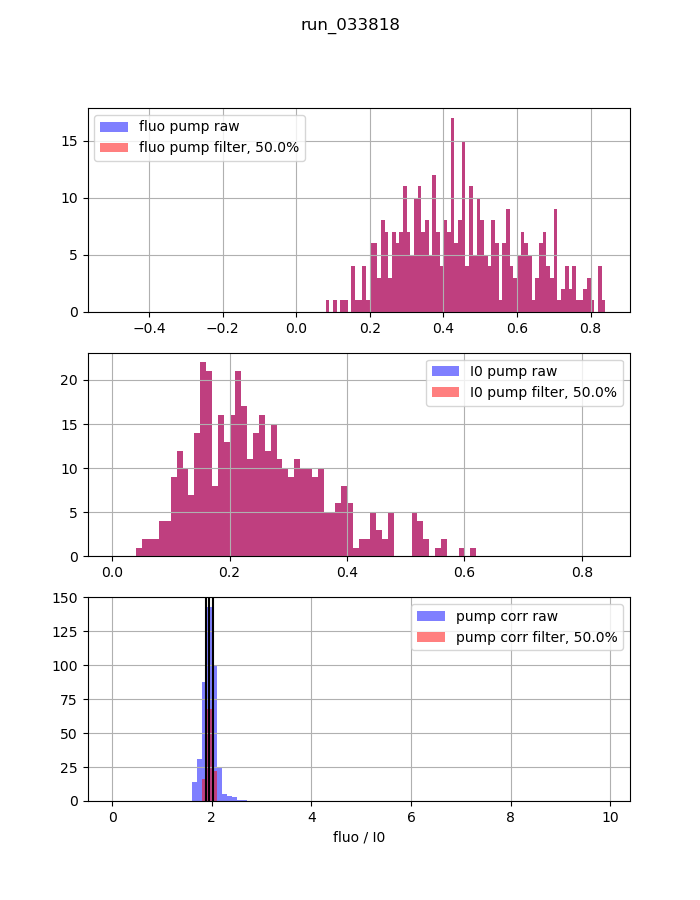

quantile range = 0.25 0.75


In [14]:
plt.figure(figsize = (7,9))
plt.suptitle(scan.files[filenumber][0].split('/')[-1].split('.')[0])

plt.subplot(311)
plt.hist(DataFluo_pump_shot_raw, bins =np.arange(-0.5,0.85,0.01), facecolor='blue', label="fluo pump raw", alpha=0.5)
plt.hist(DataFluo_pump_shot, bins =np.arange(-0.5,0.85,0.01), facecolor='red', label="fluo pump filter, {}%".format(quantile_corr*100), alpha=0.5)
plt.grid()
plt.legend(loc="best")

plt.subplot(312)
plt.hist(IzeroFEL_pump_raw, bins =np.arange(0,0.85,0.01), facecolor='blue', label='I0 pump raw', alpha=0.5)
plt.hist(IzeroFEL_pump_shot, bins =np.arange(0,0.85,0.01), facecolor='red', label ='I0 pump filter, {}%'.format(quantile_corr*100), alpha=0.5)
plt.grid()
plt.legend(loc="best")

plt.subplot(313)
x_axis = np.arange(0,10,0.1)
plt.hist(DataFluo_pump_shot_norm_raw, bins =x_axis, facecolor='blue', label='pump corr raw', alpha=0.5)
plt.hist(DataFluo_pump_shot_norm, bins =x_axis, facecolor='red', label='pump corr filter, {}%'.format(quantile_corr*100), alpha=0.5)
plt.grid()
plt.legend(loc="best")
plt.axvline(med, color = 'k') 
plt.axvline(qnt_low, color = 'k')
plt.axvline(qnt_high, color = 'k') 
plt.xlabel('fluo / I0')

plt.show()
print ('quantile range = {}'.format(0.5 - quantile_corr/2), 0.5 + quantile_corr/2)

#  Check data distributions with quantiles 

In [24]:
quantiles = [0.5, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]

channel_list_pp = [channel_Events, channel_PIPS_fluo, channel_Izero117]
channel_list_all = channel_list_pp + [channel_energy]

########################################################################
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)
Energy_eV = scan.readbacks

DataFluo_pump = []
DataFluo_unpump = []
err_DataFluo_pump = []
err_DataFluo_unpump = []

Pump_probe = []
err_Pump_probe = []

for i, step in enumerate(scan):
    check_files_and_data(step)
    clear_output(wait=True)
    filename = scan.files[i][0].split('/')[-1].split('.')[0]
    print ('Step {} of {}: Processing {}'.format(i+1, len(scan.files), filename))
    
    resultsPP, results, _, _ = load_data_compact_laser_pump(channel_list_pp, channel_list_all, step)

    IzeroFEL_pump_shot = resultsPP[channel_Izero117].pump
    IzeroFEL_unpump_shot = resultsPP[channel_Izero117].unpump
    DataFluo_pump_shot = - resultsPP[channel_PIPS_fluo].pump
    DataFluo_unpump_shot = - resultsPP[channel_PIPS_fluo].unpump
  
    
    DataFluo_pump_shot_norm = DataFluo_pump_shot / IzeroFEL_pump_shot
    DataFluo_unpump_shot_norm = DataFluo_unpump_shot / IzeroFEL_unpump_shot
    Pump_probe_shot = DataFluo_pump_shot_norm - DataFluo_unpump_shot_norm
        
    df_pump = pd.DataFrame(DataFluo_pump_shot_norm)
    df_unpump = pd.DataFrame(DataFluo_unpump_shot_norm)
    df_pump_probe = pd.DataFrame(Pump_probe_shot)
              
    DataFluo_pump.append(np.nanquantile(df_pump, quantiles))
    DataFluo_unpump.append(np.nanquantile(df_unpump, quantiles))
    Pump_probe.append(np.nanquantile(df_pump_probe, quantiles))
        
DataFluo_pump = np.asarray(DataFluo_pump)
DataFluo_unpump = np.asarray(DataFluo_unpump)
Pump_probe = np.asarray(Pump_probe)

print ("Job done!")


Step 61 of 61: Processing run_033847

--------------------------------------------------------------------------------

SAR-CVME-TIFALL5:EvtSet            923 / 1000 -> 8% loss ▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET          1000 / 1000 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY          983 / 1000 -> 2% loss ▇▇▇▇▇▇▇▇▇
SLAAR11-LTIM01-EVR0:DUMMY_PV4_NBS 1000 / 1000 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 907 / 1000 -> 9% loss
complete channels: 2 / 4 -> 50% incomplete

--------------------------------------------------------------------------------

Probe rep rate (FEL) is 100.0 Hz
Pump scheme is 1:1
Loaded 408 pump and 408 unpump shots
Job done!


<IPython.core.display.Javascript object>


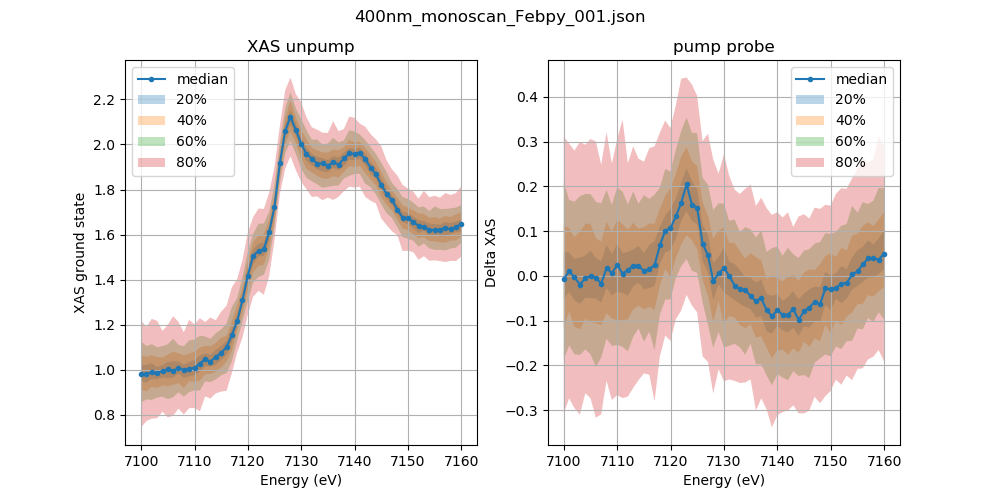

In [25]:
plt.figure(figsize = (10,5))
plt.suptitle(fc.selected.split('/')[-1])

plt.subplot(1,2,1)
plt.plot(Energy_eV, DataFluo_unpump[:,0],label='median',marker='.' )
plt.fill_between(Energy_eV,np.array(DataFluo_unpump[:,4]),np.array(DataFluo_unpump[:,5]), label='20%', alpha = 0.3)
plt.fill_between(Energy_eV,np.array(DataFluo_unpump[:,3]),np.array(DataFluo_unpump[:,6]), label='40%', alpha = 0.3)
plt.fill_between(Energy_eV,np.array(DataFluo_unpump[:,2]),np.array(DataFluo_unpump[:,7]), label='60%', alpha = 0.3)
plt.fill_between(Energy_eV,np.array(DataFluo_unpump[:,1]),np.array(DataFluo_unpump[:,8]), label='80%', alpha = 0.3)
plt.grid()
plt.gca().set_title('XAS unpump')
plt.legend(loc="best")
plt.ylabel("XAS ground state")
plt.xlabel("Energy (eV)")

plt.subplot(1,2,2)
plt.plot(Energy_eV, Pump_probe[:,0],label='median',marker='.' )
plt.fill_between(Energy_eV,np.array(Pump_probe[:,4]),np.array(Pump_probe[:,5]), label='20%', alpha = 0.3)
plt.fill_between(Energy_eV,np.array(Pump_probe[:,3]),np.array(Pump_probe[:,6]), label='40%', alpha = 0.3)
plt.fill_between(Energy_eV,np.array(Pump_probe[:,2]),np.array(Pump_probe[:,7]), label='60%', alpha = 0.3)
plt.fill_between(Energy_eV,np.array(Pump_probe[:,1]),np.array(Pump_probe[:,8]), label='80%', alpha = 0.3)
plt.grid()
plt.gca().set_title('pump probe')
plt.legend(loc="best")
plt.ylabel("Delta XAS")
plt.xlabel("Energy (eV)")

plt.show()

## cell to export data

In [12]:
DataFluo_unpump.shape

(61, 3)

In [22]:
import pandas as pd
DIR_save = "/das/work/p18/p18956/UserFolder/"
file2save = DIR_save + scan_name + ".txt"
pd.DataFrame({
    'Energy_eV' : Energy_eV,
    'pump_probe': Pump_probe,
    'signal_on' : DataFluo_pump,
    'signal_off' : DataFluo_unpump,
}).to_csv(file2save,index=False)

Exception: Data must be 1-dimensional